##  Import relavant libraries

In [1]:
#importing liraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.pop("Unnamed: 0")

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
#Data Standardization
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

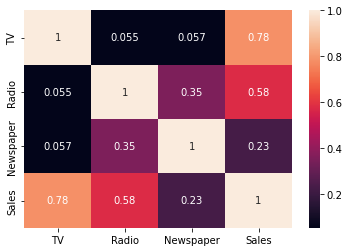

In [9]:
#Correlation coefficient
sns.heatmap(df.corr(),annot=True)

In [22]:
features= ['TV', 'Radio', 'Newspaper']
features_by_title = df.groupby('Sales')[features].sum()
features_by_title.style.background_gradient(cmap='Greens', axis='columns')

,TV,Radio,Newspaper
Sales,,,
1.600000,0.700000,39.600000,8.700000
3.200000,4.100000,11.600000,5.700000
4.800000,8.600000,2.100000,1.000000
5.300000,18.500000,30.300000,35.000000
5.500000,7.300000,28.100000,41.400000
5.600000,13.200000,15.900000,49.600000
5.700000,8.400000,27.200000,2.100000
5.900000,17.200000,4.100000,31.600000
6.600000,27.200000,54.900000,72.900000


In [24]:
## missing values

In [25]:
import missingno as msn

In [26]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

In [27]:
mis_val_colors=[]
for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_val_colors.append('red')
    else:
        mis_val_colors.append('gray')

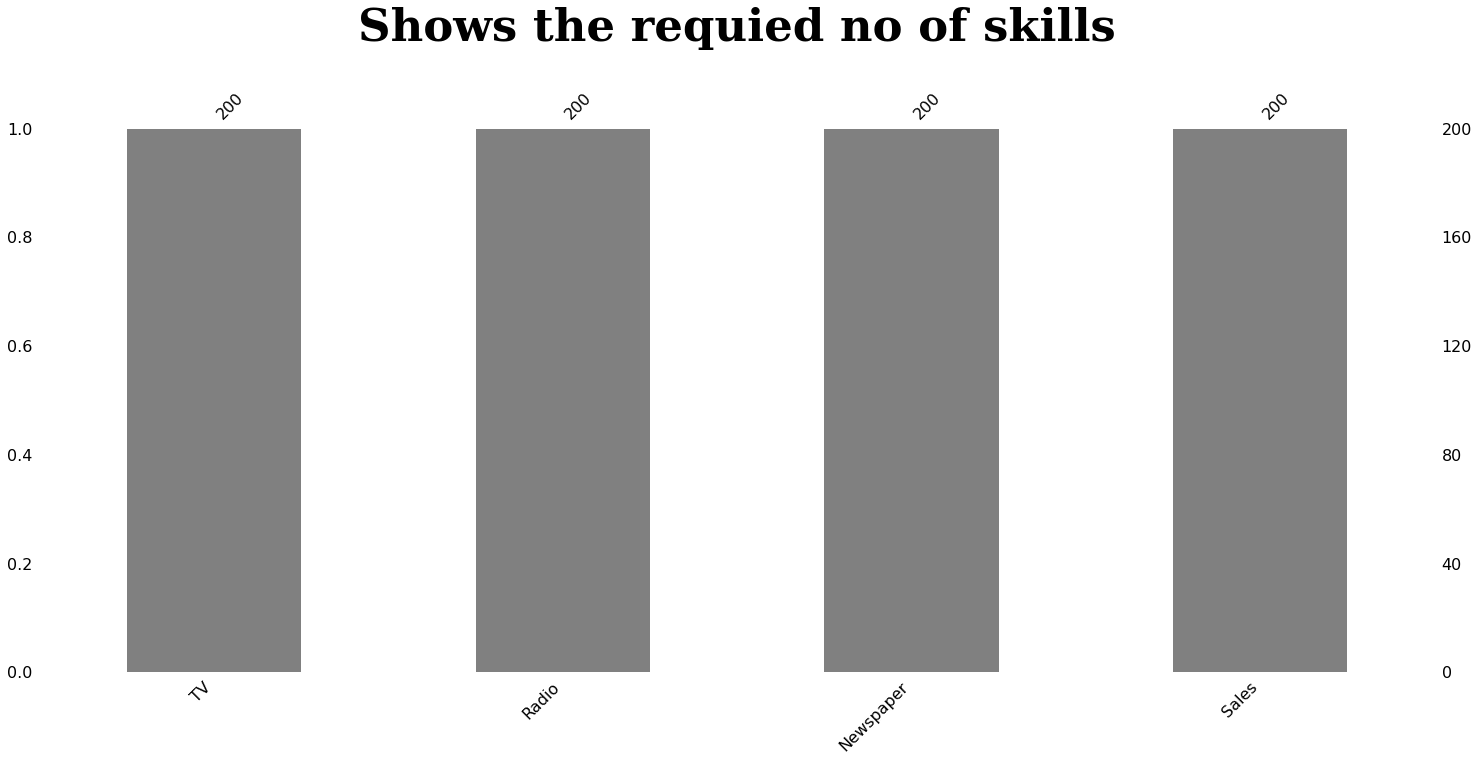

In [29]:
msn.bar(df, color=mis_val_colors)
plt.title('Shows the requied no of skills', size=45, y=1.15, **hfont)
plt.show()

## model creation

In [10]:
feature=['TV', 'Radio', 'Newspaper']
x = df[feature]
y = df ['Sales']

In [11]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [12]:
#importing libraries
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [13]:
model=[GradientBoostingRegressor()]
for i in model:
    curr_model=i
    i.fit(x_train, y_train)
    y_test_pred=i.predict(x_test)
    print(i," ","Test case R2 score in %: ",r2_score(y_test,y_test_pred)*100)

GradientBoostingRegressor()   Test case R2 score in %:  98.10285897925431
